<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-Validation-and-Train-loss" data-toc-modified-id="Plot-Validation-and-Train-loss-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot Validation and Train loss</a></span></li><li><span><a href="#Extract-relevant-Data-to-df" data-toc-modified-id="Extract-relevant-Data-to-df-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Extract relevant Data to df</a></span><ul class="toc-item"><li><span><a href="#Consider-Outliers" data-toc-modified-id="Consider-Outliers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Consider Outliers</a></span></li></ul></li><li><span><a href="#Results-by-model" data-toc-modified-id="Results-by-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Results by model</a></span><ul class="toc-item"><li><span><a href="#Remove-Duplicates" data-toc-modified-id="Remove-Duplicates-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Remove Duplicates</a></span></li></ul></li><li><span><a href="#Each-variable-plotted-against-loss:" data-toc-modified-id="Each-variable-plotted-against-loss:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Each variable plotted against loss:</a></span></li><li><span><a href="#Investigate-&quot;band&quot;-in-loss-model-plot" data-toc-modified-id="Investigate-&quot;band&quot;-in-loss-model-plot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Investigate "band" in loss-model plot</a></span><ul class="toc-item"><li><span><a href="#Extract-the-different-bands-and-inpsect" data-toc-modified-id="Extract-the-different-bands-and-inpsect-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Extract the different bands and inpsect</a></span></li></ul></li><li><span><a href="#Investigate-Duplicates" data-toc-modified-id="Investigate-Duplicates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Investigate Duplicates</a></span></li><li><span><a href="#Investigate-Best" data-toc-modified-id="Investigate-Best-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Investigate Best</a></span></li></ul></div>

In [1]:
import os
import sys
import utils


#import pipeline
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir) #to import pipeline
import pipeline


%matplotlib inline

## Plot Validation and Train loss

1 experiments conducted
(3,)


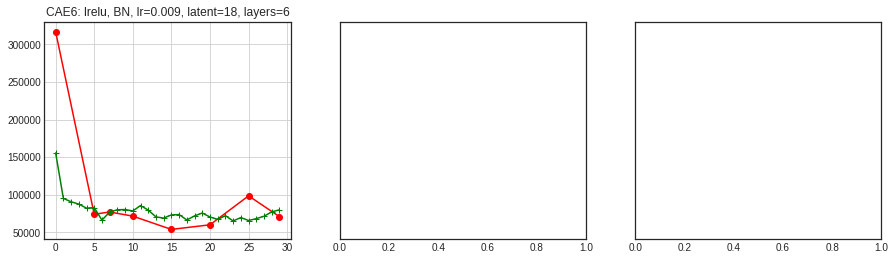

In [2]:
###CHANGE THIS FILE TO THE SUBDIRECTORY OF INTEREST:
exp_dir_base = "/data/home/jfm1118/DA/experiments/CAE_zooBN"
##############


results = utils.extract_res_from_files(exp_dir_base)
utils.plot_results_loss_epochs(results)


## Extract relevant Data to df
Use minimum validation loss as criterion.  

In theory (if we had it) it would be better to use DA MAE


In [6]:
df_res = utils.create_res_df(results)
df_res_original = df_res.copy() #save original (in case you substitute out)
df_res.tail()

,model,valid_loss,activation,latent_dims,num_layers,total_channels,channels/layer


### Consider Outliers

In [191]:
#consider third experiment run (lots of outliers)
df3 = df_res[df_res["path"].str.contains("CAE_zoo3")]

df_outlier =  df_res[df_res["valid_loss"] > 150000]

df_outlier

,model,valid_loss,activation,latent_dims,num_layers,total_channels,channels/layer,batch_norm,conv_changeover,first_channel,path
0,CAE1,192042.603426,lrelu,54,11,72,6.545455,0.0,10.0,2.0,/data/home/jfm1118/DA/experiments/CAE_zoo3/5
2,CAE1,192162.269670,relu,27,6,24,4.000000,0.0,0.0,2.0,/data/home/jfm1118/DA/experiments/CAE_zoo3/3
3,CAE1,192116.399112,lrelu,108,11,78,7.090909,0.0,10.0,2.0,/data/home/jfm1118/DA/experiments/CAE_zoo3/4
11,CAE1A,192156.166561,lrelu,36,8,61,7.625000,0.0,5.0,8.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/37


## Results by model

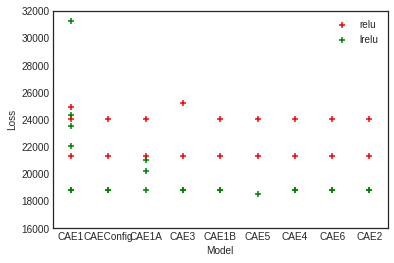

In [156]:
relu = df_res[df_res.activation == "relu"]
lrelu = df_res[df_res.activation == "lrelu"]

plt.scatter('model', "valid_loss", data=relu,  marker="+", color='r')
plt.scatter('model', "valid_loss", data=lrelu,  marker="+", color='g')

plt.ylabel("Loss")
plt.xlabel("Model")
plt.ylim(16000, 32000)
plt.legend(labels=["relu", "lrelu"])
plt.show()

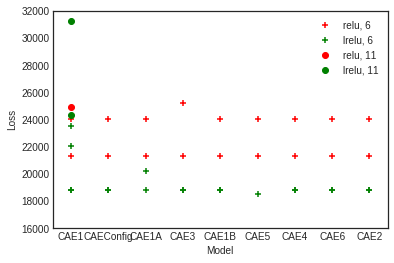

In [157]:
#investigate number of layers
relu6 = df_res[(df_res.activation == "relu") & (df_res.num_layers == 6)]
relu11 = df_res[(df_res.activation == "relu") & (df_res.num_layers == 11)]
lrelu6 = df_res[(df_res.activation == "lrelu") & (df_res.num_layers == 6)]
lrelu11 = df_res[(df_res.activation == "lrelu") & (df_res.num_layers == 11)]


plt.scatter('model', "valid_loss", data=relu6,  marker="+", color='r')
plt.scatter('model', "valid_loss", data=lrelu6,  marker="+", color='g')
plt.scatter('model', "valid_loss", data=relu11,  marker="o", color='r')
plt.scatter('model', "valid_loss", data=lrelu11,  marker="o", color='g')

plt.ylabel("Loss")
plt.xlabel("Model")
plt.ylim(16000, 32000)
plt.legend(labels=["relu, 6", "lrelu, 6", "relu, 11", "lrelu, 11"])
plt.show()

It turns out that there are lots of duplicates in the above data (as a result of a bug in my code that was giving all models the same number of channels). So remove duplicates and go again: 

### Remove Duplicates

In [158]:
#remove duplicates
columns = list(df_res_save.columns)
columns.remove("model")
columns.remove("path")
df_res_new = df_res_save.drop_duplicates(subset=columns, keep="last")
df_res_new.shape
df_res = df_res_new
df_res.shape

(19, 10)

## Each variable plotted against loss:

Text(0.5,0,'latent dimensions')

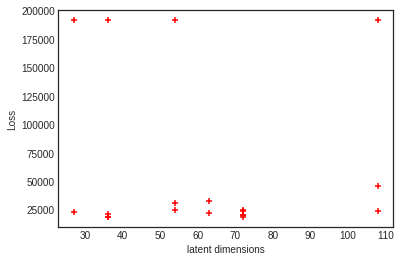

In [163]:
plt.scatter('latent_dims', "valid_loss", data=df_res, marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("latent dimensions")


Text(0.5,0,'First channel')

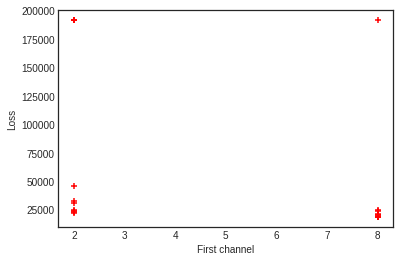

In [160]:
plt.scatter('first_channel', "valid_loss", data=df_res, marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("First channel")


(-0.1, 1.1)

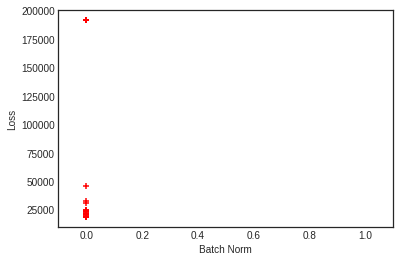

In [182]:
plt.scatter('batch_norm', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Batch Norm")
plt.xlim(-0.1, 1.1)

(16000, 30000)

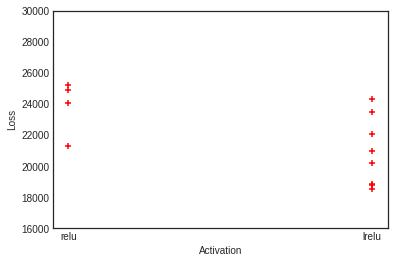

In [103]:
plt.scatter('activation', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Activation")
plt.ylim(16000, 30000)

Text(0.5,0,'Model')

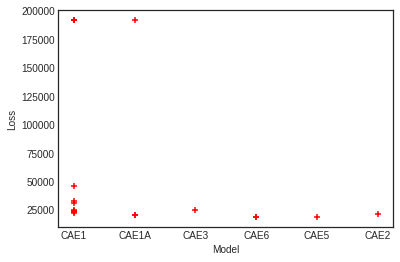

In [164]:
plt.scatter('model', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Model")


Text(0.5,0,'Number of layers in Decoder/Encoder')

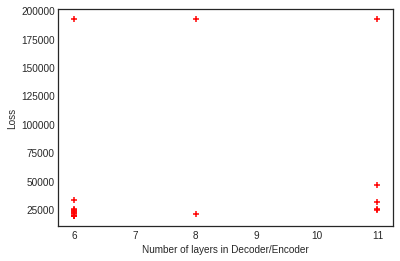

In [105]:
plt.scatter('num_layers', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Number of layers in Decoder/Encoder")


Text(0.5,0,'Total Channels')

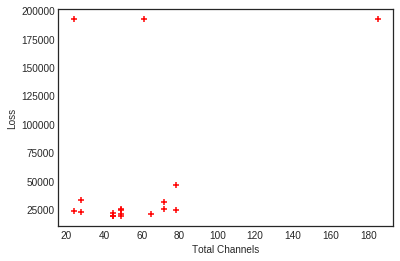

In [106]:
plt.scatter('total_channels', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Total Channels")


(16000, 32000)

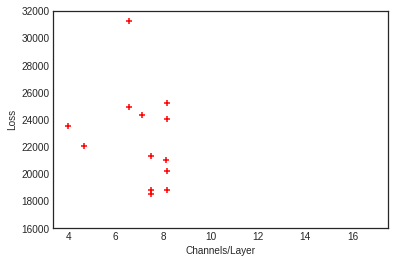

In [109]:
plt.scatter('channels/layer', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Channels/Layer")
plt.ylim(16000, 32000)


Text(0.5,0,'Input size decrease at which to change to start downsampling (via transposed convolution)')

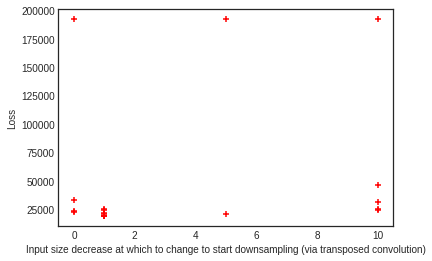

In [110]:
plt.scatter('conv_changeover', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Input size decrease at which to change to start downsampling (via transposed convolution)")


## Investigate "band" in loss-model plot

### Extract the different bands and inpsect

In [78]:
band1 = df_res[df_res.valid_loss <  20000]
band2 = df_res[(df_res.valid_loss >  20000) & (df_res.valid_loss < 23000)]
band3 = df_res[(df_res.valid_loss >  23000) & (df_res.valid_loss < 26000)]
band1.head()

,model,valid_loss,activation,latent_dims,num_layers,total_channels,channels/layer,conv_changeover,path
4,CAE1B,18792.643163,lrelu,36,6,45,7.500000,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/5
5,CAE3,18792.643163,lrelu,36,6,45,7.500000,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/25
7,CAE3,18846.080346,lrelu,72,6,49,8.166667,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/24
9,CAE2,18846.080346,lrelu,72,6,49,8.166667,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/28
11,CAE1,18792.643163,lrelu,36,6,45,7.500000,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/33


In [65]:
band3.head()

,model,valid_loss,activation,latent_dims,num_layers,total_channels,channels/layer,conv_changeover,path
1,CAE1,24912.661643,relu,54,11,72,6.545455,10.0,/data/home/jfm1118/DA/experiments/CAE_zoo/3
3,CAE1,24307.036286,lrelu,108,11,78,7.090909,10.0,/data/home/jfm1118/DA/experiments/CAE_zoo/0
10,CAE3,25226.951578,relu,72,6,49,8.166667,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/26
32,CAE1,24041.000436,relu,72,6,49,8.166667,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/34


## Investigate Duplicates


In [59]:
#eg1: /data/home/jfm1118/DA/experiments/CAE_zoo2/32 and /data/home/jfm1118/DA/experiments/CAE_zoo2/12
#eg2: /data/home/jfm1118/DA/experiments/CAE_zoo2/31 and /data/home/jfm1118/DA/experiments/CAE_zoo2/27
def get_data_from_path(path):
    for res in results:
        if res["path"] == path:
            return res
    else:
        raise ValueError("No path = {} in 'results' list".format(path))
def print_model(settings):
    model = settings.AE_MODEL_TYPE(**settings.get_kwargs())
    print(settings.__class__.__name__)
    print(model.layers)
    print(settings.CHANNELS)
    
base_exp =  "/data/home/jfm1118/DA/experiments/CAE_zoo2/" 
exp_32 = get_data_from_path(base_exp + "32")["settings"]
exp_12 = get_data_from_path(base_exp + "12")["settings"]

print_model(exp_32)
print()
print_model(exp_12)


CAE1
ModuleList(
  (0): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (1): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 2), padding=(1, 0, 0))
  (2): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 0))
  (3): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(0, 1, 0))
  (4): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1))
  (5): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1), padding=(1, 1, 0))
  (6): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1), padding=(1, 1, 0))
  (7): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1))
  (8): ConvTranspose3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(0, 1, 0))
  (9): ConvTranspose3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 0))
  (10): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 2), padding=(1, 0, 0))
  (11): ConvTranspose3d(8, 1, kernel_size=(3, 3, 3), stride=(1, 1, 1))
)
[1, 8, 8, 8, 8, 8, 8]

CAE6
ModuleList(
 

In [60]:
base_exp =  "/data/home/jfm1118/DA/experiments/CAE_zoo2/" 
exp_1 = get_data_from_path(base_exp + "31")["settings"]
exp_2 = get_data_from_path(base_exp + "27")["settings"]

print_model(exp_1)
print()
print_model(exp_2)
print(list(range(1, 2*(exp_1.get_num_layers_decode() + 1) + 1, 2)))

CAE2
ModuleList(
  (0): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (1): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 2), padding=(1, 0, 0))
  (2): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 0))
  (3): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(0, 1, 0))
  (4): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1))
  (5): Conv3d(8, 4, kernel_size=(3, 3, 2), stride=(2, 2, 1), padding=(1, 1, 0))
  (6): ConvTranspose3d(4, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1), padding=(1, 1, 0))
  (7): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1))
  (8): ConvTranspose3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(0, 1, 0))
  (9): ConvTranspose3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 0))
  (10): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 2), padding=(1, 0, 0))
  (11): ConvTranspose3d(8, 1, kernel_size=(3, 3, 3), stride=(1, 1, 1))
)
[1, 8, 8, 8, 8, 8, 4]

CAE3
ModuleList(
 

## Investigate Best

In [87]:
path = "/data/home/jfm1118/DA/experiments/CAE_zoo2/17"
exp = get_data_from_path(base_exp + str(17))["settings"]

print_model(exp_1)

CAE2
ModuleList(
  (0): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (1): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 2), padding=(1, 0, 0))
  (2): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 0))
  (3): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(0, 1, 0))
  (4): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1))
  (5): Conv3d(8, 4, kernel_size=(3, 3, 2), stride=(2, 2, 1), padding=(1, 1, 0))
  (6): ConvTranspose3d(4, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1), padding=(1, 1, 0))
  (7): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1))
  (8): ConvTranspose3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(0, 1, 0))
  (9): ConvTranspose3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 0))
  (10): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 2), padding=(1, 0, 0))
  (11): ConvTranspose3d(8, 1, kernel_size=(3, 3, 3), stride=(1, 1, 1))
)
[1, 8, 8, 8, 8, 8, 4]
